<a href="https://colab.research.google.com/github/GabCam23/MATH14-E.L.E.A.S/blob/main/AI_Awareness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [20]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [21]:
url = '/content/drive/MyDrive/Activity_1_Excel_E.L.E.A.S_(REVISED).csv'
col_name = ['Year', 'Age', 'Sex', 'Q1', 'Q6', 'Q6 Eq', 'Q7', 'Q7 Eq' ,'Q8', 'Q8 Eq', 'Q9', 'Q9 Eq', 'Q10']
dataset = pd.read_csv(url, names=col_name)

In [22]:
dataset.shape

(148, 13)

In [23]:
dataset.head(10)

,Year,Age,Sex,Q1,Q6,Q6 Eq,Q7,Q7 Eq,Q8,Q8 Eq,Q9,Q9 Eq,Q10
0,BSCpE - 1st Year,19,Male,4,Occasionally,3,Very Useful,4,Rarely,2,Moderately Useful,3,4
1,BSCpE - 1st Year,18,Female,4,Occasionally,3,Very Useful,4,Very Rarely,1,Moderately Useful,3,4
2,BSCpE - 1st Year,18,Male,5,Very Rarely,1,Moderately Useful,3,Rarely,2,Moderately Useful,3,4
3,BSCpE - 1st Year,18,Male,3,Occasionally,3,Very Useful,4,Very Rarely,1,Moderately Useful,3,5
4,BSCpE - 2nd Year,19,Male,5,Occasionally,3,Extremely Useful,5,Never Used,0,Never Useful,1,3
5,BSCpE - 2nd Year,18,Male,5,Occasionally,3,Very Useful,4,Rarely,2,Very Useful,4,5
6,BSCpE - 2nd Year,20,Male,5,Frequently,4,Extremely Useful,5,Occasionally,3,Moderately Useful,3,3
7,BSCpE - 2nd Year,18,Female,3,Occasionally,3,Very Useful,4,Rarely,2,Moderately Useful,3,3
8,BSCpE - 2nd Year,19,Male,2,Very Rarely,1,Slightly Useful,2,Very Rarely,1,Very Useful,4,5
9,BSCpE - 2nd Year,20,Male,5,Very Rarely,1,Slightly Useful,2,Never Used,0,Moderately Useful,3,5


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    148 non-null    object
 1   Age     148 non-null    int64 
 2   Sex     148 non-null    object
 3   Q1      148 non-null    int64 
 4   Q6      148 non-null    object
 5   Q6 Eq   148 non-null    int64 
 6   Q7      148 non-null    object
 7   Q7 Eq   148 non-null    int64 
 8   Q8      148 non-null    object
 9   Q8 Eq   148 non-null    int64 
 10  Q9      148 non-null    object
 11  Q9 Eq   148 non-null    int64 
 12  Q10     148 non-null    int64 
dtypes: int64(7), object(6)
memory usage: 15.2+ KB


In [25]:
dataset.describe()

,Age,Q1,Q6 Eq,Q7 Eq,Q8 Eq,Q9 Eq,Q10
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,19.250000,4.121622,2.986486,3.824324,2.236486,3.216216,4.148649
std,0.981981,0.968240,1.106484,0.886146,1.357075,1.066117,0.785627
min,18.000000,1.000000,1.000000,2.000000,0.000000,1.000000,2.000000
25%,18.000000,3.000000,2.000000,3.000000,1.000000,3.000000,4.000000
50%,19.000000,4.000000,3.000000,4.000000,2.000000,3.000000,4.000000
75%,20.000000,5.000000,4.000000,4.000000,3.000000,4.000000,5.000000
max,21.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [26]:
dataset['Q10'].value_counts()

4    57
5    57
3    33
2     1
Name: Q10, dtype: int64

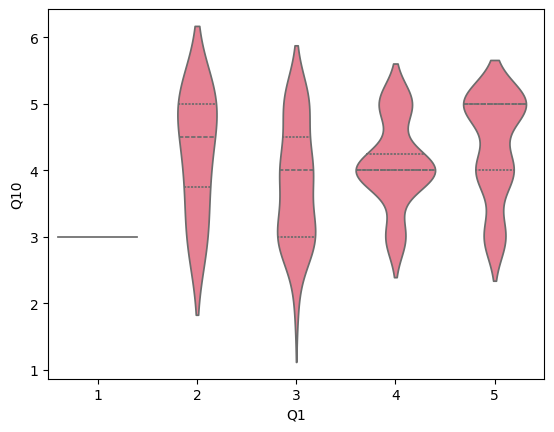

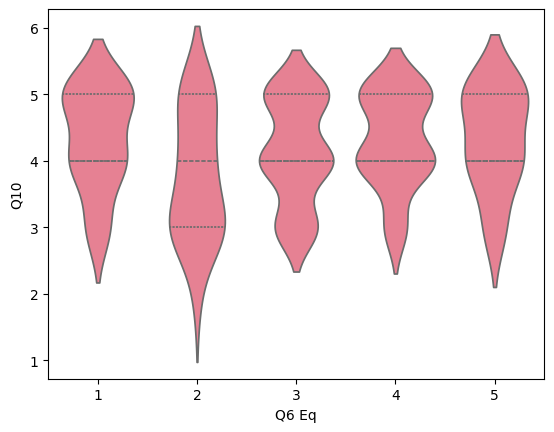

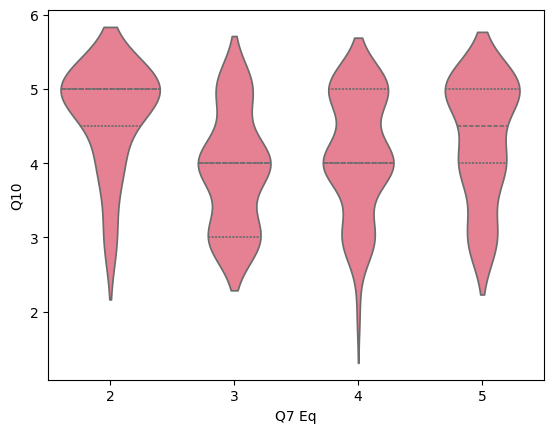

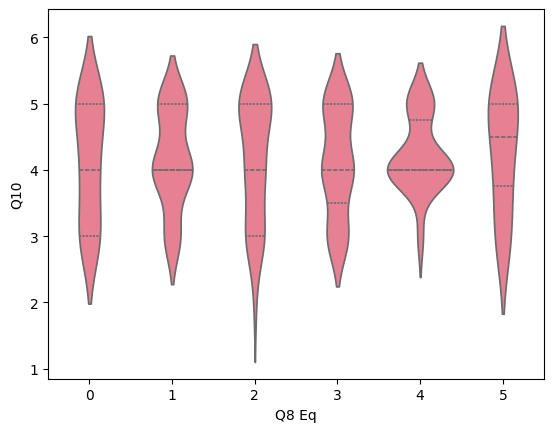

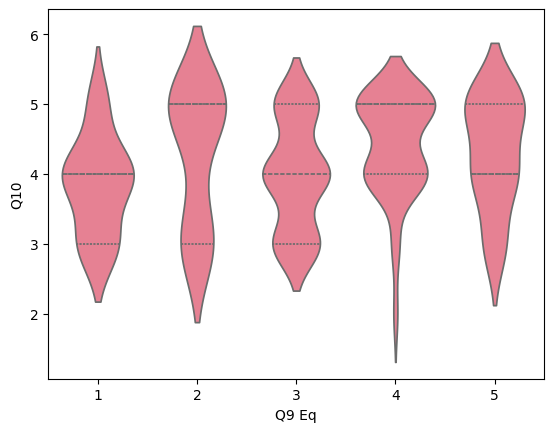

In [27]:
sns.violinplot(y='Q10', x='Q1', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Q10', x='Q6 Eq', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Q10', x='Q7 Eq', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Q10', x='Q8 Eq', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Q10', x='Q9 Eq', data=dataset, inner='quartile')
plt.show()

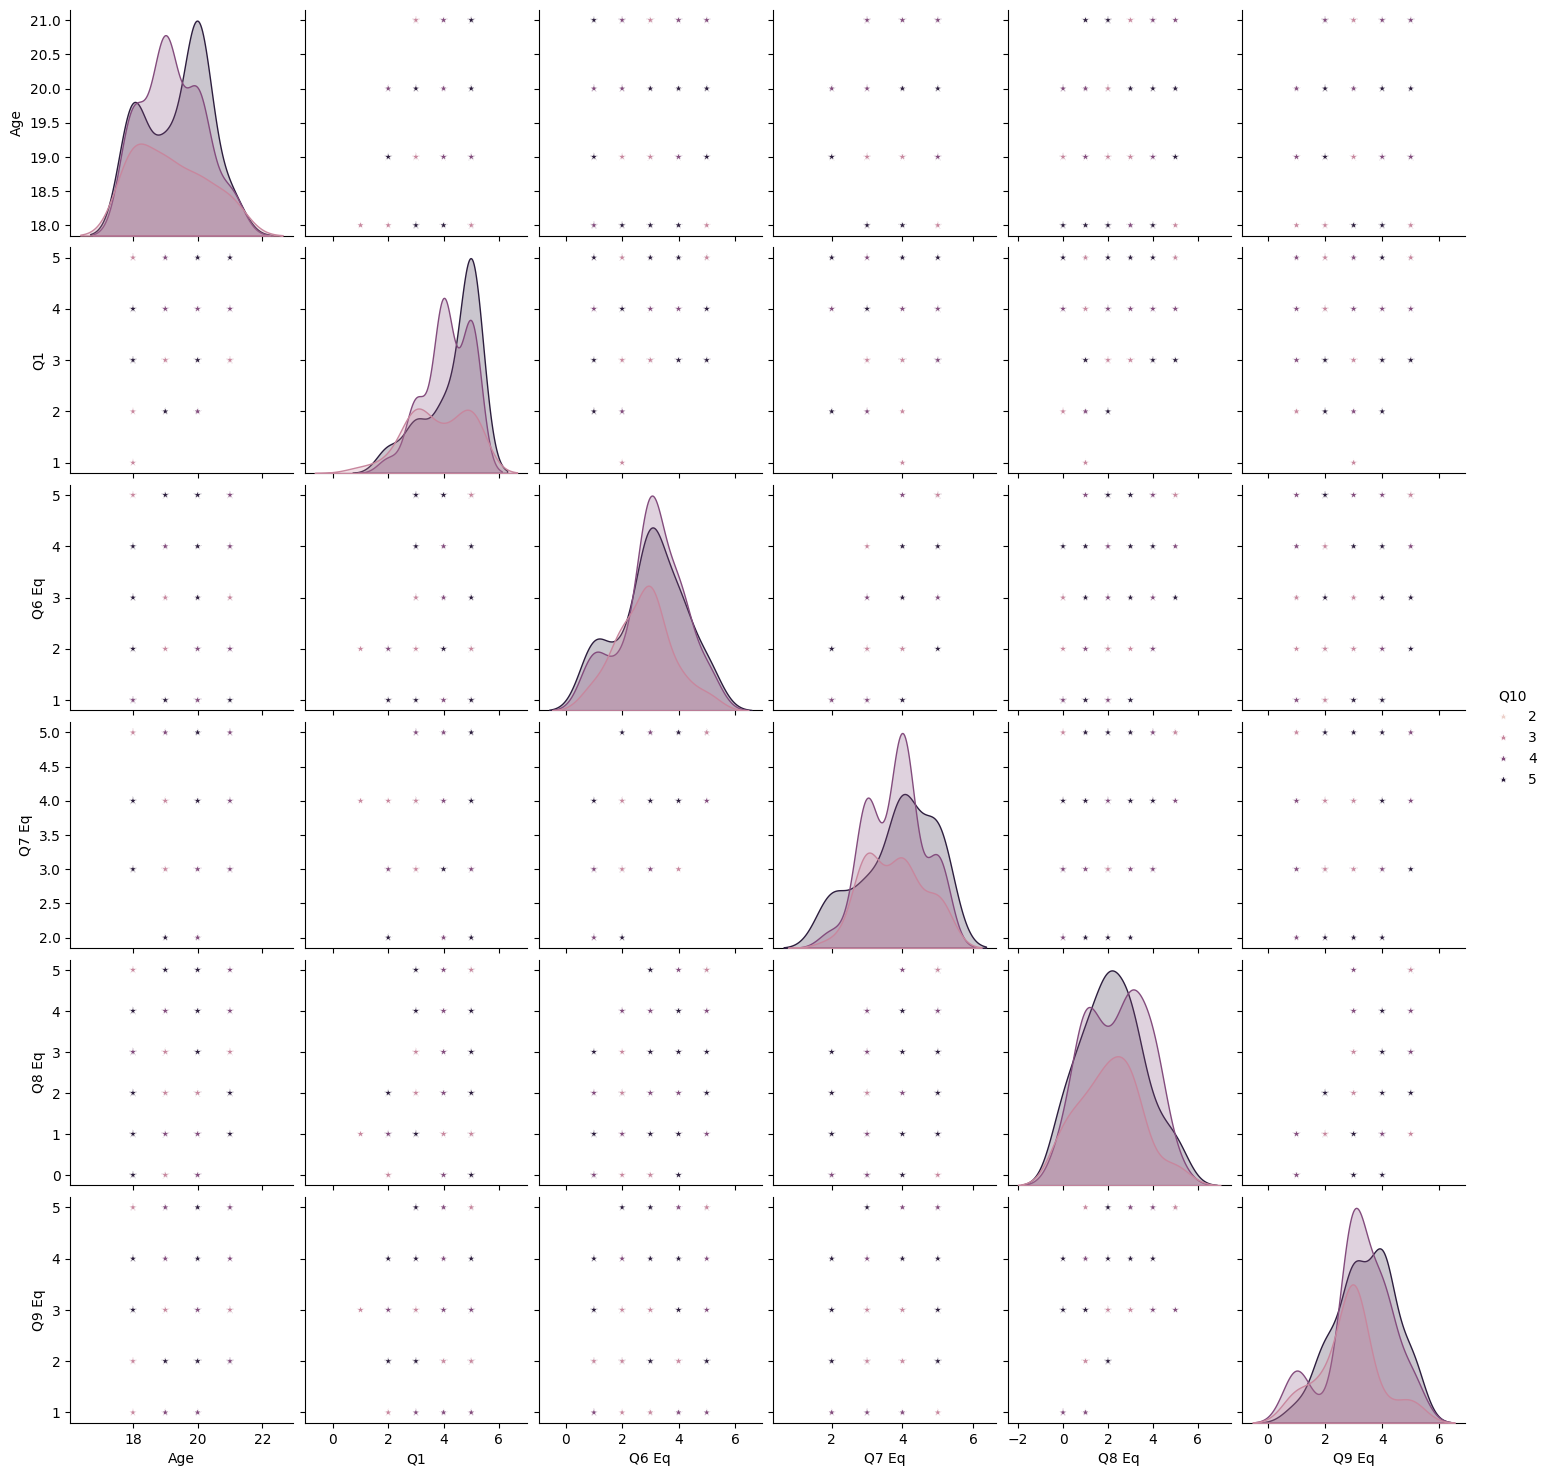

In [28]:
sns.pairplot(dataset, hue='Q10', markers='*')
plt.show()

<ipython-input-29-5996ae93e555>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='cubehelix_r')


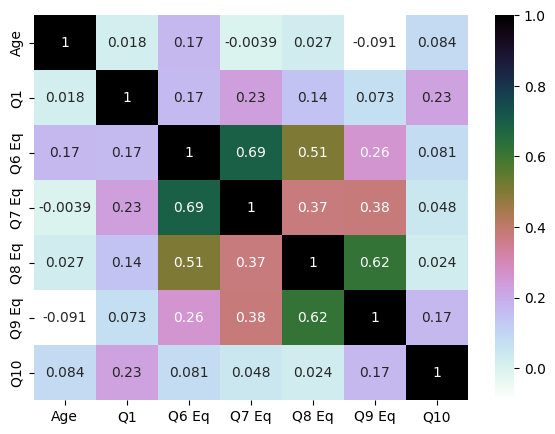

In [29]:
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [30]:
X = dataset.drop(['Q10', 'Year', 'Sex', 'Q6', 'Q7', 'Q8', 'Q9'], axis=1)
y = dataset['Q10']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (148, 6) | y shape: (148,) 


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [32]:
models = []
# models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
# evaluate each model in turn
results = []
model_names = []
for name, model in models:
  kfold = KFold(n_splits=4, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.338462 (0.096691)
KNN: 0.407692 (0.041780)
CART: 0.572692 (0.047672)
NB: 0.319615 (0.053409)
SVC: 0.513462 (0.102249)


In [33]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [34]:
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 0.5111111111111111
Classification Report: 
               precision    recall  f1-score   support

           3       0.75      0.21      0.33        14
           4       0.67      0.59      0.62        17
           5       0.38      0.71      0.50        14

    accuracy                           0.51        45
   macro avg       0.60      0.51      0.49        45
weighted avg       0.60      0.51      0.50        45

